In [1]:
import numpy as np
import operator

In [2]:
def createDataSet():
    group=np.array([[1.0,1.1],[1.0,1.0],[0,0],[0,0.1]])
    labels=['A','A','B','B']
    return group, labels

In [3]:
def classify0(inX, dataSet, labels, k):
    # 欧氏距离计算
    dataSetSize = dataSet.shape[0]
    diffMat = np.tile(inX,(dataSetSize, 1))-dataSet
    sqDiffMat = diffMat**2
    sqDistances = sqDiffMat.sum(axis=1)
    distances = sqDistances**0.5
    sortedDistIndicies = distances.argsort()
    classCount={}
#选择距离小的点
    for i in range(k):
        voteIlabel = labels[sortedDistIndicies[i]]
        classCount[voteIlabel] = classCount.get(voteIlabel, 0)+1
#排序
    sortedClassCount = sorted(classCount.items(), key= operator.itemgetter(1), reverse=True)
    return sortedClassCount[0][0]

test KNN

In [4]:
group,labels = createDataSet()
classify0([0,0],group,labels,3)


'B'

文件处理为矩阵

In [5]:
def file2matrix(filename):
    # 打开文件
    fr = open(filename)
    # 读取文件所有内容
    arrayOlines = fr.readlines()
    # 得到文件行数
    numberOfLines = len(arrayOlines)
    # 返回的NumPy矩阵numberOfLines行，3列
    returnMat = np.zeros((numberOfLines, 3))
    # 创建分类标签向量
    classLabelVector = []
    # 行的索引值
    index = 0
    # 读取每一行
    for line in arrayOlines:
        # 去掉每一行首尾的空白符，例如'\n','\r','\t',' '
        line = line.strip()
        # 将每一行内容根据'\t'符进行切片,本例中一共有4列
        listFromLine = line.split('\t')
        # 将数据的前3列进行提取保存在returnMat矩阵中，也就是特征矩阵
        returnMat[index,:] = listFromLine[0:3]
        # 根据文本内容进行分类1：不喜欢；2：一般；3：喜欢
        if listFromLine[-1] == 'didntLike':
            classLabelVector.append(1)
        elif listFromLine[-1] == 'smallDoses':
            classLabelVector.append(2)
        elif listFromLine[-1] == 'largeDoses':
            classLabelVector.append(3)
        index += 1
    # 返回标签列向量以及特征矩阵
    return returnMat, classLabelVector

In [6]:
datingDataMat,datingLabels = file2matrix('datingTestSet.txt')
datingDataMat
# datingLabels[0:20]

array([[4.0920000e+04, 8.3269760e+00, 9.5395200e-01],
       [1.4488000e+04, 7.1534690e+00, 1.6739040e+00],
       [2.6052000e+04, 1.4418710e+00, 8.0512400e-01],
       ...,
       [2.6575000e+04, 1.0650102e+01, 8.6662700e-01],
       [4.8111000e+04, 9.1345280e+00, 7.2804500e-01],
       [4.3757000e+04, 7.8826010e+00, 1.3324460e+00]])

show data

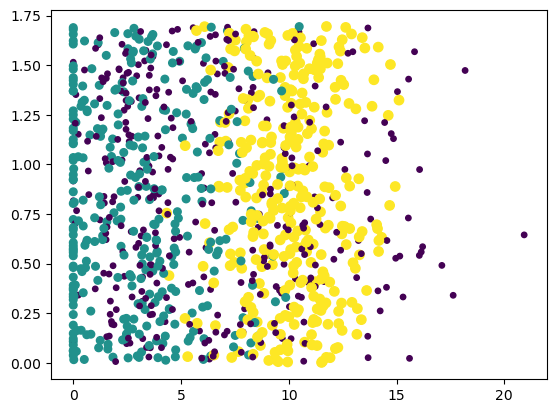

In [7]:
import matplotlib
import matplotlib.pyplot as plt
fig=plt.figure()
ax = fig.add_subplot(111)
#根据不同标签绘制不同颜色和大小
ax.scatter(datingDataMat[:,1],datingDataMat[:,2], 15.0*np.array(datingLabels), 15.0*np.array(datingLabels))
plt.show()

归一化特征值，使不同类特征值权重相同

In [8]:
def autoNorm(dataSet):
    minVals = dataSet.min(0)
    maxVals = dataSet.max(0)
    ranges = maxVals - minVals
    normDataSet = np.zeros(np.shape(dataSet))
    m = dataSet.shape[0]
    normDataSet = dataSet - np.tile(minVals, (m,1))
    normDataSet = normDataSet/np.tile(ranges, (m,1))
    return normDataSet, ranges, minVals


In [9]:
normMat, ranges, minVals = autoNorm(datingDataMat)
ranges

array([9.1273000e+04, 2.0919349e+01, 1.6943610e+00])

测试集测试正确率

In [10]:
def datingClassTest():
    # 打开文件名
    filename = "datingTestSet.txt"
    # 将返回的特征矩阵和分类向量分别存储到datingDataMat和datingLabels中
    datingDataMat, datingLabels = file2matrix(filename)
    # 取所有数据的10% hoRatio越小，错误率越低
    hoRatio = 0.5
    # 数据归一化，返回归一化数据结果，数据范围，最小值
    normMat, ranges, minVals = autoNorm(datingDataMat)
    # 获取normMat的行数
    m = normMat.shape[0]
    # 10%的测试数据的个数
    numTestVecs = int(m * hoRatio)
    # 分类错误计数
    errorCount = 0.0
    for i in range(numTestVecs):
        # 前numTestVecs个数据作为测试集，后m-numTestVecs个数据作为训练集
        # k选择label数+1（结果比较好）
        classifierResult = classify0(normMat[i,:], normMat[numTestVecs:m,:],\
                                     datingLabels[numTestVecs:m], 4)
        print("分类结果:%d\t真实类别:%d" % (classifierResult, datingLabels[i]))
        if classifierResult != datingLabels[i]:
            errorCount += 1.0
    print("错误率:%f%%" % (errorCount/float(numTestVecs)*100))

In [11]:
datingClassTest()

分类结果:3	真实类别:3
分类结果:2	真实类别:2
分类结果:1	真实类别:1
分类结果:1	真实类别:1
分类结果:1	真实类别:1
分类结果:1	真实类别:1
分类结果:3	真实类别:3
分类结果:3	真实类别:3
分类结果:1	真实类别:1
分类结果:3	真实类别:3
分类结果:1	真实类别:1
分类结果:1	真实类别:1
分类结果:2	真实类别:2
分类结果:1	真实类别:1
分类结果:1	真实类别:1
分类结果:1	真实类别:1
分类结果:1	真实类别:1
分类结果:1	真实类别:1
分类结果:2	真实类别:2
分类结果:3	真实类别:3
分类结果:2	真实类别:2
分类结果:1	真实类别:1
分类结果:1	真实类别:2
分类结果:3	真实类别:3
分类结果:2	真实类别:2
分类结果:3	真实类别:3
分类结果:2	真实类别:2
分类结果:3	真实类别:3
分类结果:2	真实类别:2
分类结果:1	真实类别:1
分类结果:3	真实类别:3
分类结果:1	真实类别:1
分类结果:2	真实类别:3
分类结果:1	真实类别:1
分类结果:3	真实类别:2
分类结果:1	真实类别:1
分类结果:1	真实类别:1
分类结果:2	真实类别:2
分类结果:3	真实类别:3
分类结果:3	真实类别:3
分类结果:1	真实类别:1
分类结果:2	真实类别:2
分类结果:3	真实类别:3
分类结果:3	真实类别:3
分类结果:3	真实类别:3
分类结果:1	真实类别:1
分类结果:1	真实类别:1
分类结果:1	真实类别:1
分类结果:1	真实类别:1
分类结果:2	真实类别:2
分类结果:2	真实类别:2
分类结果:1	真实类别:1
分类结果:3	真实类别:3
分类结果:2	真实类别:2
分类结果:2	真实类别:2
分类结果:2	真实类别:2
分类结果:2	真实类别:2
分类结果:3	真实类别:3
分类结果:1	真实类别:1
分类结果:2	真实类别:2
分类结果:1	真实类别:1
分类结果:2	真实类别:2
分类结果:2	真实类别:2
分类结果:2	真实类别:2
分类结果:2	真实类别:2
分类结果:2	真实类别:2
分类结果:3	真实类别:3
分类结果:2	真实类别:2
分类结果:3	真实类别:3
分类结果:1	真实类别:1
分类结果:2	真实类别:2
分类结果:3

构建可用咨询系统，输入数值计算喜欢程度

In [12]:
def classifyPerson():
    resultList = ['无感', '小喜欢', '很喜欢']
    percentTats = float(input("玩视频游戏的时间占用百分比？"))
    ffMiles = float(input("每年获得的飞行常客里程数："))
    iceCream = float(input("每周消费的冰淇淋公升数："))
    filename = "datingTestSet.txt"
    datingDataMat, datingLabels = file2matrix(filename)
    normMat,ranges, minVals = autoNorm(datingDataMat)
    inArr = np.array([percentTats,ffMiles,iceCream])
    norminArr = (inArr-minVals)/ranges
    classifierResult = classify0(norminArr,normMat,datingLabels,4)
    print("你对这个人喜欢程度是%s" %resultList[classifierResult-1])

In [13]:
classifyPerson()

你对这个人喜欢程度是无感
